# Ford GoBike Trip Data Analysis
## by Azadeh Iranmehr

## Investigation Overview

> In this presentation, my goal is to conduct an explanatory data analysis on Ford GoBike Trip dataset to better understand user's behaviours , characteristics and specifications . We can find impacts of weather, gender, age, hour of the day , days of the week, months and other items on the number of trips or trip duration in this bike system.

## Dataset Overview

>The dataset, 2017-fordgobike-tripdata.csv, is downloaded from following link and licensed by Ford GoBike. This dataset includes 519,700 trips with 15 features such as locations, time, and user attributes for bike_sharing system. Bike-sharing is gaining popularity, since it provides a convenient solution for short distance transportation, especially where the typical public transportation systems could not cover thoroughly. Riders can pick up a bike from one station and drop off at any other in the network. In return the system can keep on operating with income from: 1. rider membership fee(subscribers), or 2. one time pay-to-ride rental fee(customers).
This document explores a this dataset containing information about individual rides of Ford GoBike sharing system covering in 2017.
Dataset address is :
https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv

In [11]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time



%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [12]:
# load in the dataset into a pandas dataframe
# load in the data from 2017 into one dataframe 
df = pd.read_csv('2017-forgobike-tripdata.csv', parse_dates=True)

In [13]:
df_clean = df.copy()

In [14]:
#  Convert time variables from string to datetime
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
# extract month charecter and number of the year
df_clean['start_month_num'] = df_clean['start_time'].apply(lambda time: time.month)
df_clean['start_month_char'] = df_clean['start_month_num'].apply(lambda x: calendar.month_abbr[x])

In [15]:
# morning, afternoon, night of a day
df_clean['start_hour'] = df_clean['start_time'].apply(lambda time: time.hour)
df_clean['period_day'] = 'morning'
df_clean['period_day'][(df_clean['start_hour'] >= 12) & (df_clean['start_hour'] <= 17)] = 'afternoon'
df_clean['period_day'][(df_clean['start_hour'] >= 18) & (df_clean['start_hour'] <= 23)] = 'night'

In [16]:
# Day of the week
df_clean['start_weekday_num'] = df_clean['start_time'].apply(lambda time: time.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df_clean['start_weekday_char'] = df_clean['start_weekday_num'].map(dmap)
df_clean['start_time_month_date'] = df_clean['start_time'].map(lambda time: time.strftime('%m-%d'))

In [17]:
# convert time period, month, and weekday into ordered categorical types
ordinal_var_dict = {'start_month_char': ['Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
                    'period_day': ['morning', 'afternoon', 'night'],
                    'start_weekday_char': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

In [18]:
# convert the user_type and member_gender to categorical data
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

In [19]:
# convert the data type of member birth year to int
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0).astype(int)

In [20]:
# create a new column of member age from member birth year
# filter out incorrect data
df_clean['member_age'] = 2017 - df_clean['member_birth_year']
df_clean.member_age.replace(2017, np.NaN, inplace=True)
df_clean = df_clean[df_clean.member_age < 80]
df_clean = df_clean[df_clean.member_age >= 10]

##  Univariate Exploration
### 1- distribution of trip durations.

> Write a comment about your visualization here. The visualization should be in
the next cell, as a sub-slide type. Make sure your visualizations are polished!

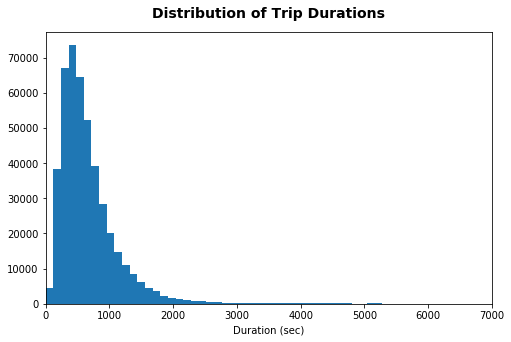

In [21]:
binsize = 60*2
bins = np.arange(0, df_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.xlim(0,7000)
plt.title('Distribution of Trip Durations',  y=1.03,fontsize=14, fontweight='semibold');

The distributiondistribution is strongly right skewed. So I will check the  on a log scale.

In [ ]:
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [10, 30, 100, 300, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.title('Distribution of Trip Durations',  y=1.03,fontsize=14, fontweight='semibold');
#sb.distplot(df_clean.duration_sec.apply(np.log10))

When plotted on a log-scale, the duration distribution now seems normal distribution with one peak between 500 and 600 seconds.

## 2- distribution of user age, user type and gender

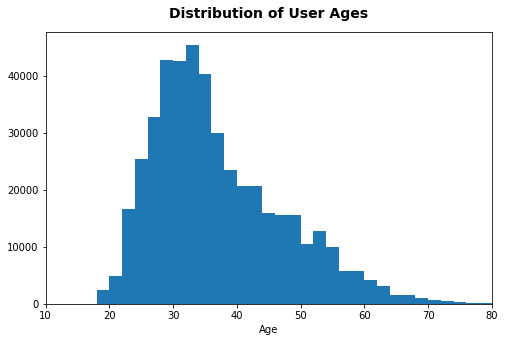

In [23]:
# distribution of age
binsize = 2
bins = np.arange(0, df_clean['member_age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = 'member_age', bins = bins);
plt.xlim(10, 80)
plt.xlabel('Age');
plt.title('Distribution of User Ages',  y=1.03,fontsize=14, fontweight='semibold');

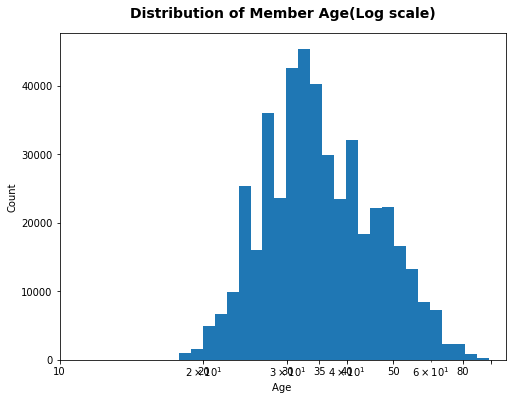

In [24]:
# there's a long tail in the distribution, so use log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df_clean['member_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 6])
plt.hist(data = df_clean, x = 'member_age', bins = bins)
plt.xscale('log')
plt.xticks([10,20,30,35,40,50,70,80], [10,20,30,35,40,50,80])
plt.xlabel('Age ')
plt.ylabel('Count')
plt.title('Distribution of Member Age(Log scale)',  y=1.03,fontsize=14, fontweight='semibold');

After putting our plot on log scale, it get close to normal distribution with the mean of 36

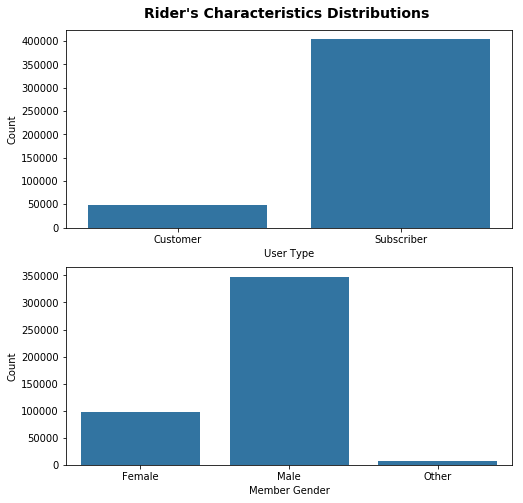

In [25]:
#  distributions of user type and gender
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
sb.countplot(data = df_clean, x = 'user_type', color = default_color, ax = ax[0])
sb.countplot(data = df_clean, x = 'member_gender', color = default_color, ax = ax[1])
ax[0].set_xlabel('User Type')
ax[0].set_ylabel('Count')
ax[1].set_xlabel('Member Gender')
ax[1].set_ylabel('Count')
ax[0].set_title('Rider\'s Characteristics Distributions ',  y=1.03,fontsize=14, fontweight='semibold');

Most of the users are Subscriber than Customer. Most of the users are Male than Female . Male bike rides is 3 times more than female

## 3- Month distribution

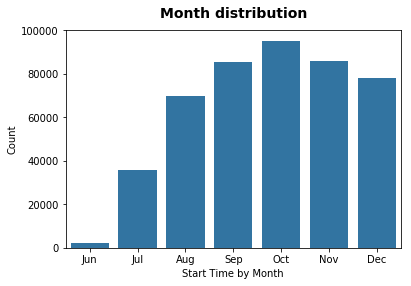

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_month_char', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Count')
plt.title('Month distribution',  y=1.03,fontsize=14, fontweight='semibold');

October has the most and june has the least number of trip count. Number of trips on June is extremly low . That should have further investigation for this month. It is obvious that during hot weather less users use this bike system and during good weather like in October or November more user use this system.

### 4- Weekday distribution 

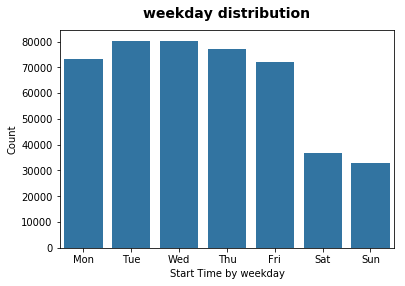

In [27]:

base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='start_weekday_char', color=base_color)
plt.xlabel('Start Time by weekday')
plt.ylabel('Count')
plt.title('weekday distribution',  y=1.03,fontsize=14, fontweight='semibold');

Most trips took place during week days. And less trips are on weekends.

## 5- Start time distribution 

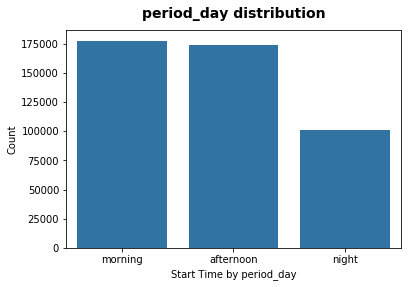

In [28]:


base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, x='period_day', color=base_color)
plt.xlabel('Start Time by period_day')
plt.ylabel('Count')
plt.title('period_day distribution',  y=1.03,fontsize=14, fontweight='semibold');

Number of trip at night is less than morning and afternoon.

## 6-Top 10 stations with most trip ends

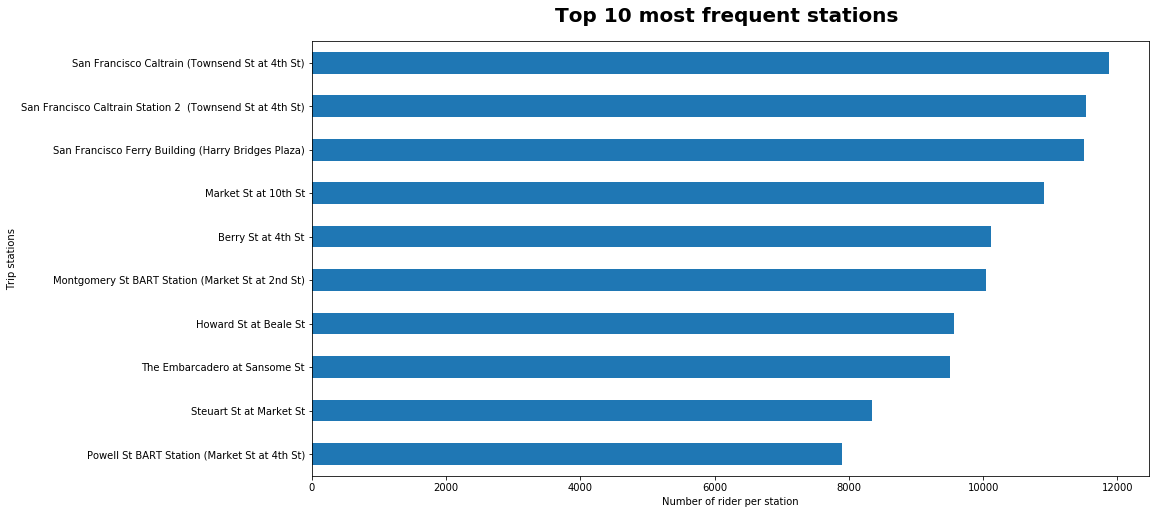

In [30]:
#6-Top 10 stations with most trip ends
start_stn = df_clean["start_station_name"].value_counts().nlargest(10)
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(15,8))
start_stn.sort_values(ascending=True).plot(kind='barh', color=base_color)
plt.title("Top 10 most frequent stations ", y=1.03,fontsize=20, fontweight='semibold')
plt.ylabel("Trip stations")
plt.xlabel("Number of rider per station");


## 7-Top 10 stations where most trip starts

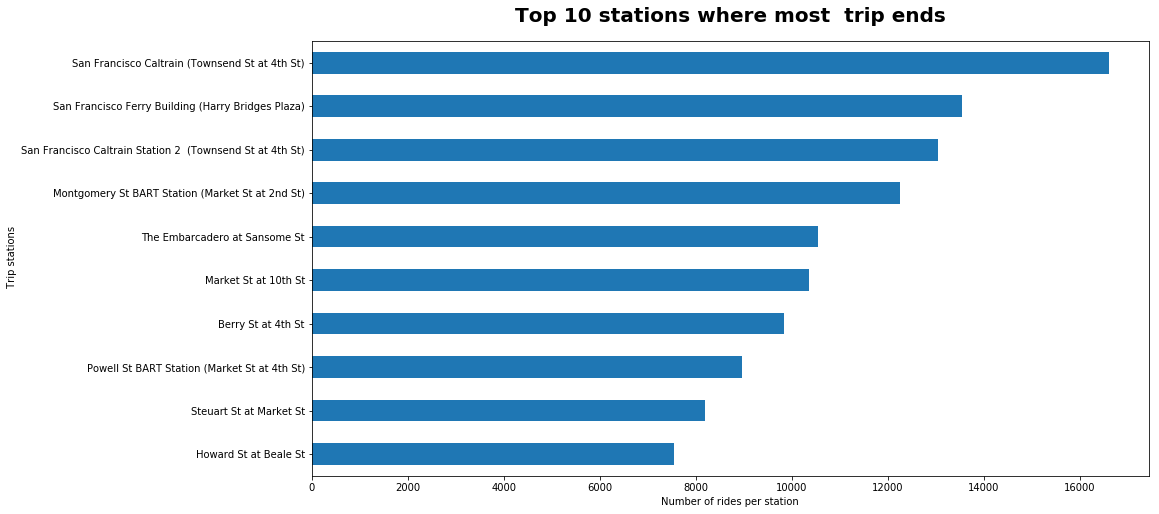

In [31]:
end_stn = df_clean["end_station_name"].value_counts().nlargest(10)
base_color = sb.color_palette()[0]
fig = plt.figure(figsize=(15,8))
end_stn.sort_values(ascending=True).plot(kind='barh', color=base_color)
plt.title("Top 10 stations where most  trip ends",  y=1.03,fontsize=20, fontweight='semibold')
plt.ylabel(" Trip stations")
plt.xlabel("Number of rides per station");

# Bivariate Exploration

## 1- Number of trip per user type during the day of the week

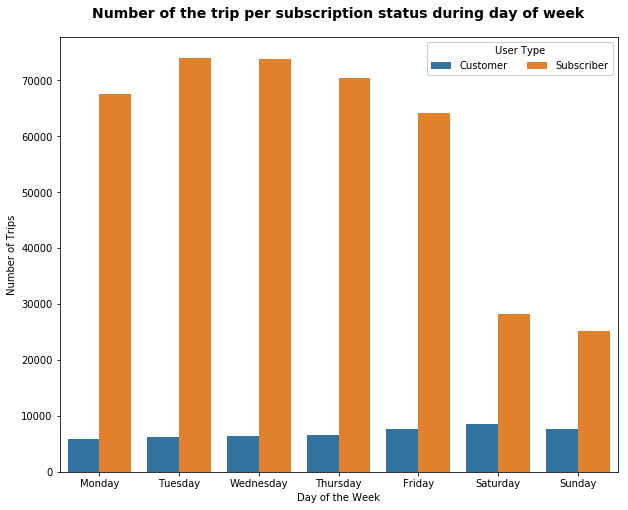

In [32]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'start_weekday_char', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2, 3, 4, 5, 6]
labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(ticks, labels)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of the trip per subscription status during day of week',  y=1.03,fontsize=14, fontweight='semibold');

Number of trips for subscriber users is much more than customers during days of the week.

## 2- Number of trip per user type during the day of the week

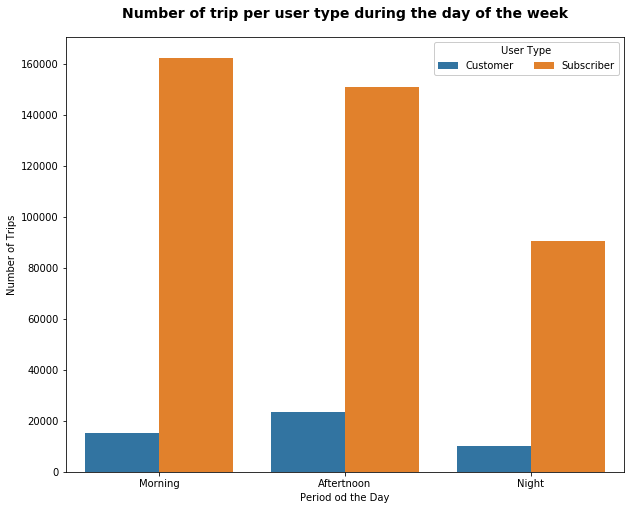

In [33]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'period_day', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2]
labels = ['Morning','Aftertnoon','Night']
plt.xticks(ticks, labels)
plt.xlabel('Period od the Day')
plt.ylabel('Number of Trips')
plt.title('Number of trip per user type during the day of the week',  y=1.03,fontsize=14, fontweight='semibold');

Number of trip for subscriber is much more than customer during the day.

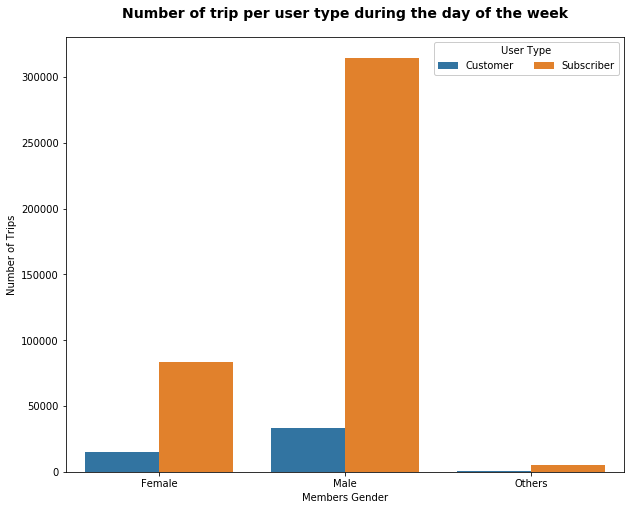

In [34]:
# create a clustered bar chart showing usage by day of the week and user type
plt.figure(figsize=(10,8))
ax = sb.countplot(data = df_clean, x = 'member_gender', hue = 'user_type')
ax.legend(loc = 1, ncol = 2, framealpha = 1, title = 'User Type')

ticks = [0, 1, 2]
labels = ['Female','Male','Others']
plt.xticks(ticks, labels)
plt.xlabel('Members Gender')
plt.ylabel('Number of Trips')
plt.title('Number of trip per user type during the day of the week',  y=1.03 ,fontsize=14, fontweight='semibold');

Male have more number of trip than Female and Subscribers have more number of trip than customer

## 3- Correlation between age and duration second

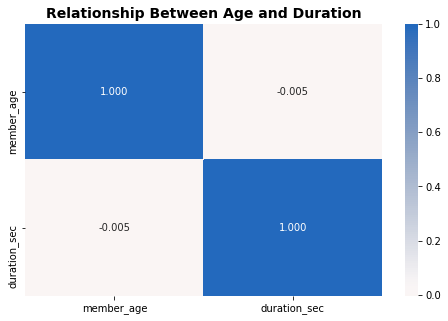

In [35]:
#  correlation between member age and duration second
plt.figure(figsize = [8, 5])
x=['member_age','duration_sec']
sb.heatmap(df_clean[x].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Relationship Between Age and Duration',  y=1.03,fontsize=14, fontweight='semibold');

Based on heatmap pllot member age and duration are negatively correlated but this negative correlation is not strong.

## 4- Median of member age and trip duration for 4 top more frequent start station

In [36]:
start_stn = df_clean['start_station_name'].value_counts().nlargest(5)
start_stn

San Francisco Caltrain (Townsend St at 4th St)               11875
San Francisco Caltrain Station 2  (Townsend St at 4th St)    11533
San Francisco Ferry Building (Harry Bridges Plaza)           11503
Market St at 10th St                                         10904
Berry St at 4th St                                           10122
Name: start_station_name, dtype: int64

In [37]:
locs = ['San Francisco Ferry Building (Harry Bridges Plaza)','The Embarcadero at Sansome St','San Francisco Caltrain (Townsend St at 4th St)','San Francisco Caltrain Station 2  (Townsend St at 4th St)']
df_clean2 = df_clean.loc[df_clean['start_station_name'].isin(locs)]

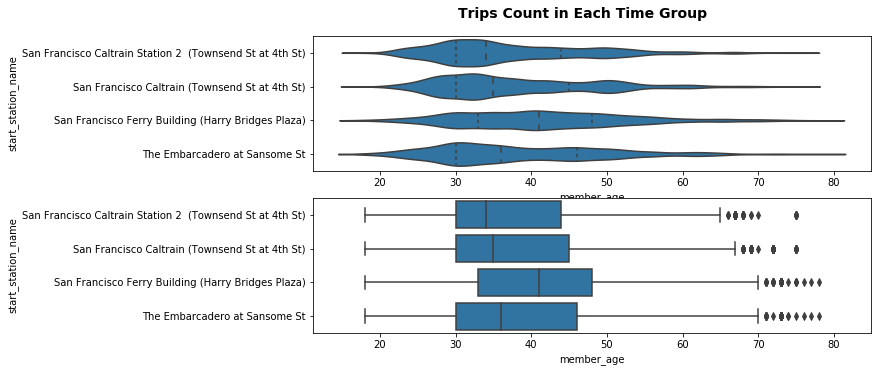

In [38]:
fig = plt.figure(figsize=(10,5))
plt.subplots_adjust(top=0.95)
fig.suptitle('Trips Count in Each Time Group', y=1.03, fontsize=14, fontweight='semibold')
base_color = sb.color_palette()[0]

# Top plot: violin plot
plt.subplot(211)
ax1= sb.violinplot(data = df_clean2, y = 'start_station_name', x = 'member_age', color = base_color,
              inner = 'quartile')

# Bottom plot: box plot
plt.subplot(212)
sb.boxplot(data = df_clean2, y = 'start_station_name', x = 'member_age', color = base_color)
plt.xlim(ax1.get_xlim()); # set x-axis limits to be same as upper plot

Median of member age for 4 top more frequent start station are almost the same (abouit 36 years old)except San Francisco Ferry Building(Harry Bridges Plaza) that has greater median age than others(about 42 years old).

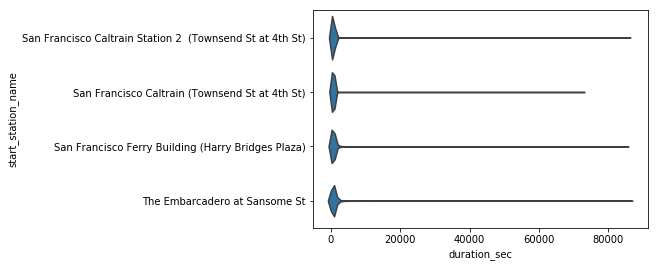

In [39]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df_clean2, y = 'start_station_name', x = 'duration_sec', color = base_color,
              inner = None);

Violon plot to show duration_sec for top 4 frequent stations are not explicit.So I prefer to use box plot with log scale instead.

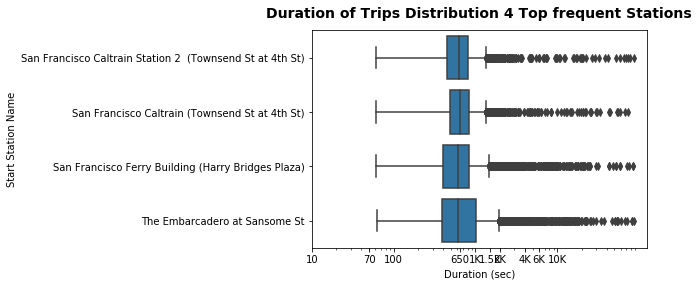

In [40]:
base_color = sb.color_palette()[0]
sb.boxplot(data = df_clean2, y = 'start_station_name', x = 'duration_sec', color = base_color)
plt.xscale('log')
plt.xticks([10,50,100,650,1000,1500,2000,4000,6000,10000], [10,70,100,650,'1K','1.5K','2K','4K','6K','10K'])
plt.xlabel('Duration (sec)')
plt.ylabel('Start Station Name')
plt.title('Duration of Trips Distribution 4 Top frequent Stations' , y=1.03, fontsize=14, fontweight='semibold');

In [41]:
# Check high outliers in duration of trips
len(df_clean2.query('duration_sec > 1500')['duration_sec'])/len(df_clean2['duration_sec'])

0.05323005561685168

The median of duration (second) are around 650 second. However, after 1500 second, there are a lot of high outliers around 5.3%

## 5- compare  age of two user types

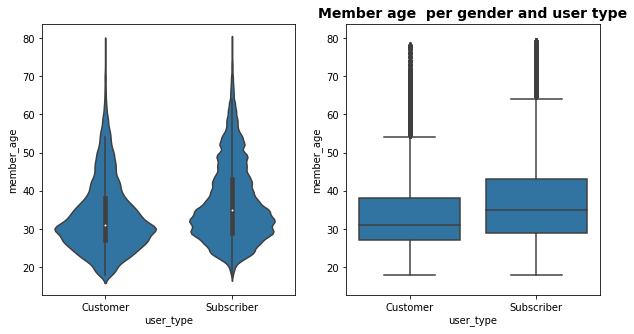

In [42]:
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_clean, x = 'user_type', y = 'member_age', color = base_color)

# right plot: box plot
plt.subplot(1, 2, 2)
g=sb.boxplot(data = df_clean, x = 'user_type', y = 'member_age', color = base_color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.title('Member age  per gender and user type', fontsize=14, fontweight='semibold');

from violon plot and box plot above, we can see that subscribers have more median age than customers.

## 6- Distribution of trip duration for all available months of the year 2007

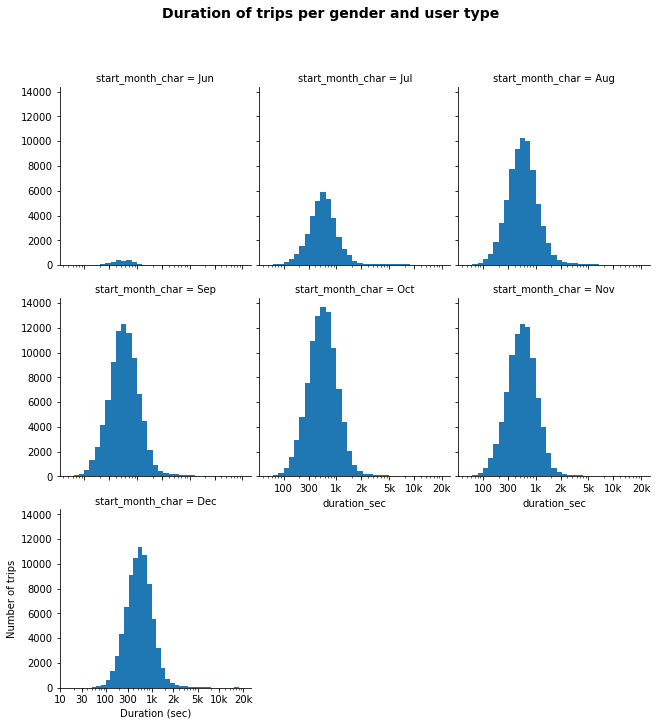

<Figure size 576x360 with 0 Axes>

In [43]:
g = sb.FacetGrid(data = df_clean, col = 'start_month_char', col_wrap=3)

log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(df_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
g.map(plt.hist, 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([10, 30, 100, 300, 1e3, 3e3, 1e4, 3e4, 1e5], [10, 30, 100, 300, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Duration (sec)')
plt.ylabel('Number of trips')
plt.tight_layout(pad=0.1)
g.fig.suptitle('Duration of trips per gender and user type', y=1.1, fontsize=14, fontweight='semibold');

Except June with totally low data to demonstrate ( To me it is wierd and it should be investigated in future analysis), other months in data base have normal distibution with different peak and almost the same average duration (sec). Octomer have greatest peak for duration of trip.

## 7- Average value of age per gender

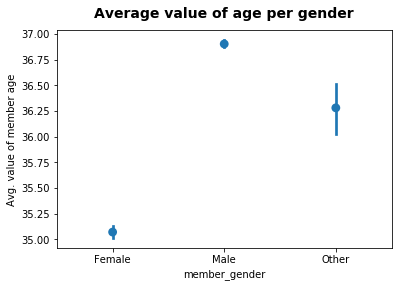

In [45]:
base_color = sb.color_palette()[0]
sb.pointplot(data = df_clean, x = 'member_gender', y = 'member_age', color = base_color, linestyles="")
plt.ylabel('Avg. value of member age')
plt.title('Average value of age per gender', y=1.03, fontsize=14, fontweight='semibold');

Average value of member age for Male is almost 37.90 which is greater than female with average value of 35.1 and for other gender is 36.25. The uncertainty in the mean based on variance and sample size for other gender is greater than others, and for female is greather than male.

## 8-Number of trips taken by different user group

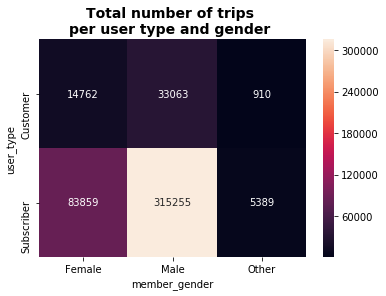

In [46]:
ct_counts = df.groupby(['member_gender', 'user_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'user_type', columns = 'member_gender', values = 'count')
sb.heatmap(ct_counts, annot = True, fmt = 'd')
plt.title('Total number of trips \nper user type and gender ', y=1.03, fontsize=14, fontweight='semibold');

Number of male subscriber is the greatest and number of female customer is the smalest .

In [47]:
trips = df_clean.groupby(['user_type','member_gender']).size()
trips = trips.reset_index(name='trip_count')
total = trips.trip_count.sum()
trips = trips.pivot('user_type','member_gender', 'trip_count')/total*100

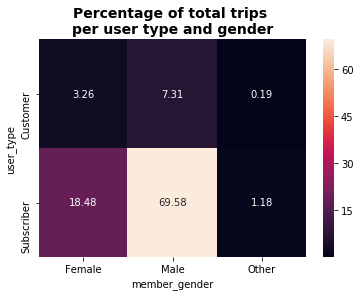

In [48]:
sb.heatmap(trips, annot=True, fmt=".2f");
plt.title('Percentage of total trips \nper user type and gender', y=1.03, fontsize=14, fontweight='semibold');

18.84% of the trips are made by female subscribers, 69.58% by male subscriber. Only 3.26% by one-time female customers and 7.31 by male customers.

In [49]:
bin_edges = np.arange(10,90,10)
bin_idxs = pd.cut(df_clean['member_age'], bin_edges, right=False, include_lowest=True, labels=False).astype(int)

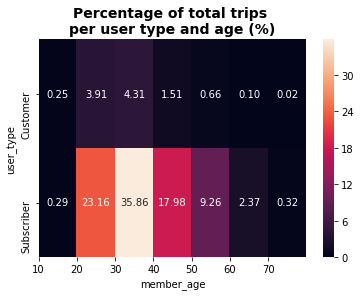

In [50]:
df0 = df_clean.groupby([bin_idxs, 'user_type']).size()
df0 = df0.reset_index(name='trip_count')
df0 = df0.pivot('user_type','member_age', 'trip_count')/total*100
sb.heatmap(df0, annot=True, fmt=".2f");
plt.xticks([0,1,2,3,4,5,6],['10','20','30','40','50','60','70'])
plt.title('Percentage of total trips \nper user type and age (%)', y=1.03, fontsize=14, fontweight='semibold');

Subscribers group with rang age of 30-40 years old has the greatest percentage of the total trips(35.86%) and custumers group with rang age of 70-80 years old has the least percentage of the total trips(0.02) .

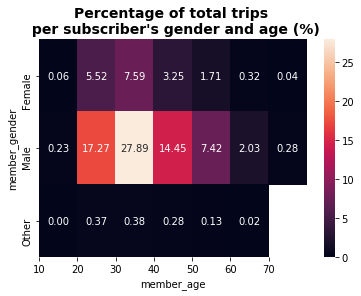

In [51]:
df1 = df_clean.query('user_type == "Subscriber"').groupby([bin_idxs, 'member_gender']).size()
df1 = df1.reset_index(name='trip_count')
df1 = df1.pivot('member_gender', 'member_age', 'trip_count')/total*100

sb.heatmap(df1, annot=True, fmt=".2f");
plt.xticks([0,1,2,3,4,5,6],['10','20','30','40','50','60','70'])
plt.title('Percentage of total trips \n per subscriber\'s gender and age (%)' , y=1.03, fontsize=14, fontweight='semibold');

Male riders with the age rang 30-40 years has the greatest percentage of total trip.



By plotting the percentage of trips taken by different user groups with heatmaps, we can get a feel for the user behavior across gender, age, and their subscription status. 

## 9-Number of trip started during hour of the day


No handles with labels found to put in legend.


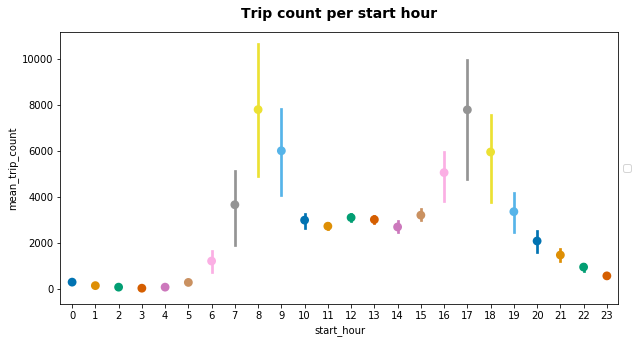

In [52]:
# create point plots to compare mean trip count during start hour of a day

fig = plt.figure(figsize=(10,5))

df1 = df_clean.groupby(['start_weekday_char','start_hour']).size()
df1 = df1.reset_index(name='mean_trip_count')


sb.pointplot(data = df1, x = 'start_hour', y = 'mean_trip_count', palette = 'colorblind', linestyles = '')
plt.title('Trip count per start hour', y=1.03, fontsize=14, fontweight='semibold' )
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));


Most of the riders in this system start their trip at of 8:00 and 17:00 .Most tips usually took place between 7:00 to 17:00. Less trip took place during night.

# Multivariant exploration



## 1-Trip duration per user type and day of week

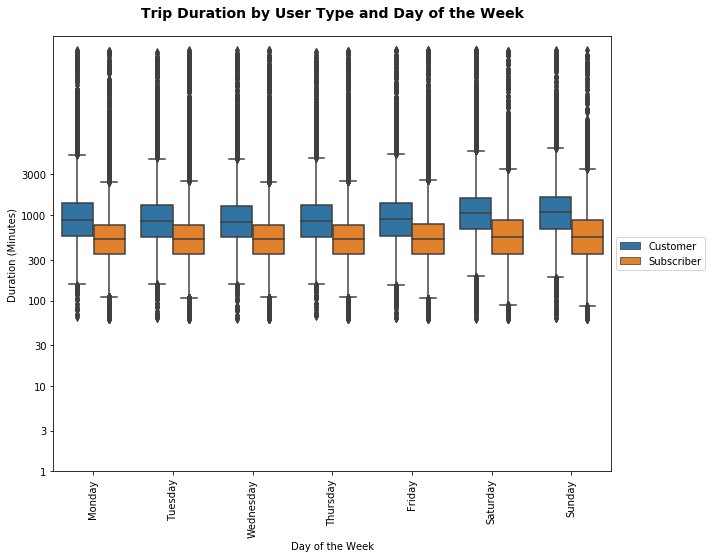

In [53]:
# create clustered box plots to compare trip duration by day of week and user type

df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
sb.boxplot(data = df_clean, x = 'start_weekday_char', y = 'log_duration_sec', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2, 3, 4, 5, 6]
xlabels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Day of the Week')
plt.ylabel('Duration (Minutes)')
plt.title('Trip Duration by User Type and Day of the Week', y=1.03, fontsize=14, fontweight='semibold');

The trip duration for Customers is greater than Subscribers and during weekends is greater than weekdays.

## 2-Trip duration per Gender and user type

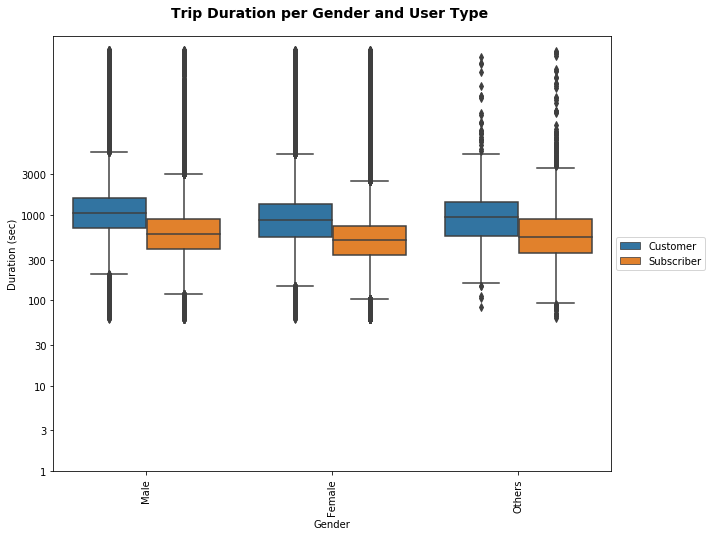

In [54]:
# create clustered box plots to compare trip duration per gender and user type

df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
sb.boxplot(data = df_clean, x = 'member_gender', y = 'log_duration_sec', hue = 'user_type')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

xticks = [0, 1, 2]
xlabels = ['Male','Female','Others']
plt.xticks(xticks, xlabels, rotation = 90)

ylabels = [1, 3, 10, 30, 100, 300, 1000, 3000]
yticks = np.log10(ylabels)
plt.yticks(yticks, ylabels)
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Trip Duration per Gender and User Type ',y=1.03, fontsize=14, fontweight='semibold');

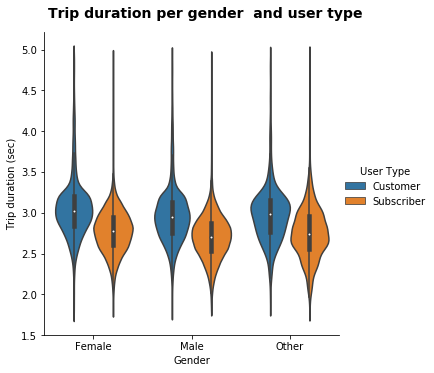

In [56]:
# Use violinplot to show duration (sec) distribution per gender and user type
df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
g = sb.catplot(data=df_clean, x='member_gender', y="log_duration_sec", hue="user_type", kind="violin")

g.set_axis_labels("Gender", "Trip duration (sec)")
g._legend.set_title('User Type')
g.fig.suptitle('Trip duration per gender  and user type ', y=1.03, fontsize=14, fontweight='semibold');

The trip duration for Customers is greater than Subscribers.The trip duration for female is greater than male and other.

<Figure size 720x576 with 0 Axes>

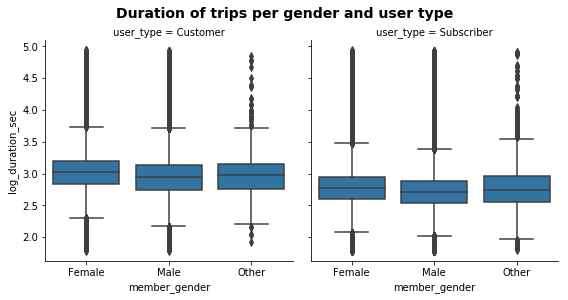

In [58]:
df_clean['log_duration_sec'] = np.log10(df_clean['duration_sec'])
plt.figure(figsize=(10,8))
g = sb.FacetGrid(data = df_clean, col = 'user_type', size = 4)
g.map(sb.boxplot, 'member_gender', 'log_duration_sec')
g.fig.suptitle('Duration of trips per gender and user type', y=1.03, fontsize=14, fontweight='semibold');



Three plot above were used to show trip duration per gender and user type. From all above , I found that the trip duration for Customers is greater than Subscribers.The trip duration for female is greater than male and other and for males is less than female and other.

## 3-Ages of users in different user's group

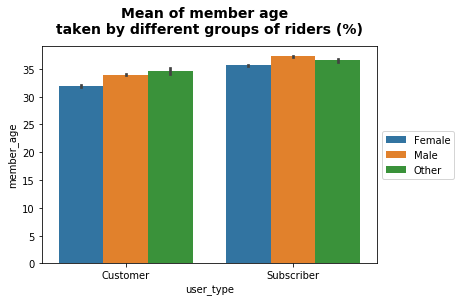

In [59]:
#For two categorical variables and one numeric variable we can use clustered bar chart 
#using the barplot function instead of the countplot function
ax = sb.barplot(data = df_clean, x = 'user_type', y = 'member_age', hue = 'member_gender')
#ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'member_gender')
plt.title('Mean of member age  \ntaken by different groups of riders (%)', y=1.03, fontsize=14, fontweight='semibold');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

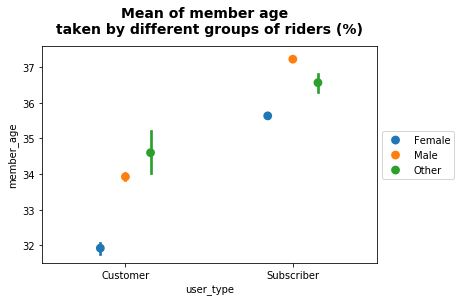

In [60]:
# use pointplot functions for 2 categorical variable and one numerical variable in a clustered fashion
ax = sb.pointplot(data = df_clean, x = 'user_type', y = 'member_age', hue = 'member_gender',
                  dodge = 0.3, linestyles = "")
plt.title('Mean of member age  \ntaken by different groups of riders (%)', y=1.03, fontsize=14, fontweight='semibold');
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

You can see two different plot to show age of 2 different user types(customer or subscriber) for different gender types. In my opinion pointplot is the best to show the difference between ages between these groups. The uncertainty in the mean based on variance and sample size for "Other Gender" is greater than others because we have low data in this group.Female customers have least age, Male subscribers have greatest age. Amount of uncertainty for Other group greater than male or female .

## 4-Hourly trip count per gender and user type

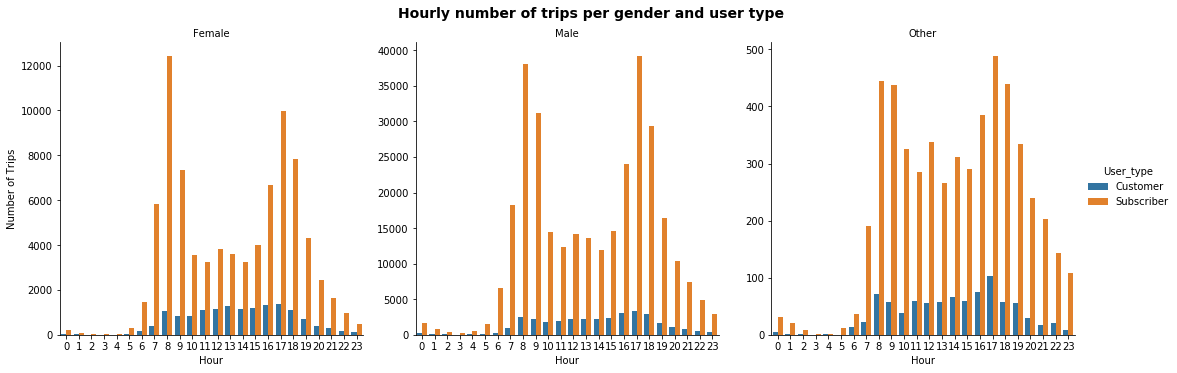

In [62]:
# hourly usege of the bike sharing system per user type and gender

g = sb.catplot(data=df_clean, x='start_hour', col="member_gender", hue='user_type', kind='count', sharey = False)
g.set_axis_labels("Hour", "Number of Trips")
g._legend.set_title('User_type')
g.set_titles("{col_name}")
g.fig.suptitle('Hourly number of trips per gender and user type', y=1.03, fontsize=14, fontweight='semibold');

 Customers ride bikes mainly between 8:00 am to 19:00 ; subscribers on the other side bike between around 8:00-9:00 to 17:00 - 18:00 in their commute to work.The peak number of trips are at 8:00 or 9:00 in the morning and at 17:00 or 18:00 in the afternoon. As we saw in previous plots ,in this plot we can also see that subscribers have much more trips than customers. In this plot we can also see that number of trip for male users is much greater than female and for female is much greater than other.

## 5-Hourly trip count  and duration over the week and months

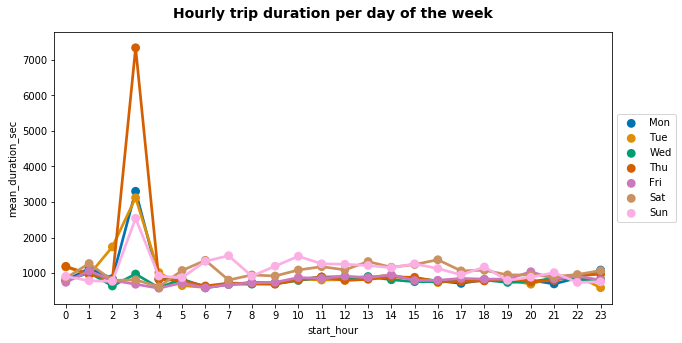

In [63]:
# create  point plots to compare trip duration per day of week and start hour
fig = plt.figure(figsize=(10,5))
df2 = df_clean.groupby(['start_weekday_char', 'start_hour'])['duration_sec'].mean()
df2 = df2.reset_index(name='mean_duration_sec')
sb.pointplot(data = df2, x = 'start_hour', y = 'mean_duration_sec', hue = 'start_weekday_char',
palette = 'colorblind', linestyles = '-')
plt.title('Hourly trip duration per day of the week', y=1.03, fontsize=14, fontweight='semibold' )
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

Trip duration during the weekend is usually greater than the weekdays. I think it is because the riders usually use this system on weekends for vacation and visiting city with no rush so the time duration was increased for them. Longest trips are at night.

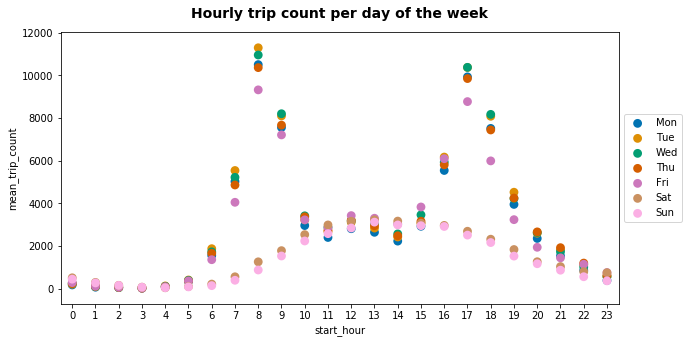

In [64]:
# create clustered point plots to compare mean trip count and mean trip duration by day of week and user type

fig = plt.figure(figsize=(10,5))

df1 = df_clean.groupby(['start_weekday_char','start_hour']).size()
df1 = df1.reset_index(name='mean_trip_count')


sb.pointplot(data = df1, x = 'start_hour', y = 'mean_trip_count', hue = 'start_weekday_char', palette = 'colorblind', linestyles = '')
plt.title('Hourly trip count per day of the week', y=1.03, fontsize=14, fontweight='semibold' )
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5));

Most of the riders in this system start their trip at  8:00 and 17:00 during weekdays.Most tips usually took place between 7:00 to 17:00. Less trip took place during night. During weekend most of the trips start at noon

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!